# **Analise de Acidentes Aéreos Ocorridos no Brasil de 2010 a 2019 ✈️**

A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro. Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG).

São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011). Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo Painel SIPAER disponível na página do [CENIPA](http://www.dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as grafico
import seaborn as sns
import statistics as static
from collections import Counter
import math


*  **Pandas** 

A biblioteca Pandas é utilizada para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis pelo usuário. Eles podem aumentar muito a produtividade, pois permitem que você personalize o ambiente do Pandas exatamente de acordo com suas preferências. EX: alterar algumas das configurações de exibição do Pandas para alterar quantas linhas e colunas são mostradas e com que precisão os números de ponto flutuante são exibidos (VOITTO, 2021)


*  **NumPy**

NumPy é usada principalmente para realizar cálculos em Arrays Multidimensionais. O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos (MEDIUM, 2018).



*  **Matplotlib**

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral e foi feita para a linguagem de programação Python. Além disso, ele oferece uma interface de programação orientada a objetos para incluir gráficos através de toolkits de interface gráfica como o Tkinter, Wxpython, Qt ou GTK (MEDIUM, 2020).


*  **Seaborn**

A biblioteca Seaborn trabalha em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada (VOOOO, 2017).


*  **Scipy/scipy.stats**

O SciPy é o pacote principal de rotinas científicas em Python, que se destina a operar de forma eficiente em matrizes numpy, de modo que numpy e scipy trabalhem lado a lado. scipy contém várias ferramentas dedicadas a problemas comuns em computação científica. Seus diferentes sub-módulos correspondem a diferentes aplicações, tais como interpolação, integração, otimização, processamento de imagens, estatísticas, funções especiais, etc (UFPR, ?).


*  **Collections counter**

Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagens (PYTHON, ?)

### Importação Dataset

In [ ]:
dados = pd.read_csv('ocorrencias_cenipa.csv', encoding='utf8')

### Tabela do Dataset

In [ ]:
dados.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


### Colunas Dataset

In [ ]:
dados.columns.values

array(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'], dtype=object)

### Colunas selecionadas

In [ ]:
Columns = ['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano']

colunasSelecionadas = dados.filter(items = Columns)
colunasSelecionadas

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,79117,ACIDENTE,INDETERMINADO,ASSIS BRASIL,AC,2019-10-23,2019,15:00:00,SIM,FINALIZADA,...,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
5238,79119,ACIDENTE,INDETERMINADO,SÃO JOSÉ DO RIO CLARO,MT,2019-10-11,2019,10:00:00,SIM,FINALIZADA,...,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
5239,79123,ACIDENTE,INDETERMINADO,ANTONINA,PR,2019-09-21,2019,18:30:00,SIM,FINALIZADA,...,NÃO,TRIKE,INDETERMINADO,INDETERMINADO,SEM TRAÇÃO,0,0,BRASIL,DECOLAGEM,SUBSTANCIAL
5240,79203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FLORIANÓPOLIS,SC,2019-12-20,2019,16:37:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,2,1980,BRASIL,CORRIDA APÓS POUSO,LEVE


### Análise total de acidentes pelo tipo

In [ ]:
coluna_acidente = colunasSelecionadas['tipo']
teste = coluna_acidente.value_counts().sort_values(ascending=False)
teste

INCIDENTE          2887
ACIDENTE           1694
INCIDENTE GRAVE     661
Name: tipo, dtype: int64

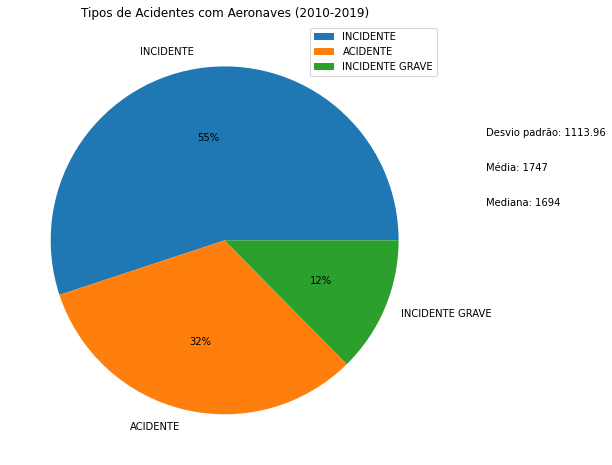

In [ ]:
#Visualização no gráfico
grafico.figure(figsize=(10, 8))
tipo_acidentes = coluna_acidente.value_counts()

grafico.pie(tipo_acidentes, labels = tipo_acidentes.index, autopct='%2.i%%')
grafico.title("Tipos de Acidentes com Aeronaves (2010-2019)")


grafico.text(1.5, 0.2, 'Mediana: %d'%(np.median(np.array(teste))))
grafico.text(1.5, 0.4, 'Média: %d'%(np.mean(np.array(teste))))
grafico.text(1.5, 0.6, 'Desvio padrão: %.2f'%(static.stdev(teste)))  

grafico.legend()
grafico.show()

Conforme a análise gráfica podemos concluir que a maior porcentagem de ocorrências é do **incidentes** com 2887 casos (55%)  e a menor se dá para **incidentes graves** com 661 dos casos (12%), no período de 2010 a 2019.

###  Análisa o número de acidentes por estado

In [ ]:
coluna_estado = colunasSelecionadas['estado']
coluna_estado.value_counts().sort_index()

AC      54
AL      30
AM     217
AP       9
BA     200
CE      78
DF     129
ES      70
GO     286
MA      68
MG     482
MS     132
MT     255
PA     263
PB      23
PE      90
PI      36
PR     441
RJ     480
RN      14
RO      30
RR      49
RS     334
SC     166
SE      21
SP    1239
TO      46
Name: estado, dtype: int64

In [ ]:
def numero_em_cima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
estado = Counter(dados['estado'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

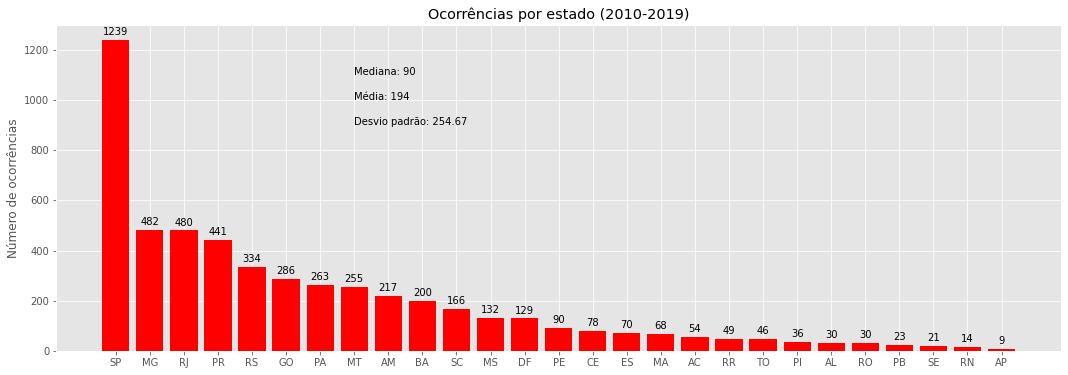

In [ ]:
grafico.style.use("ggplot")
fig,ax = grafico.subplots(figsize=(18, 6))

x=fase_estado
y=contador_estado

rects1=ax.bar(x, y,color='Red')

ax.set_xticks(x)
grafico.ylabel("Número de ocorrências")
grafico.title('Ocorrências por estado (2010-2019)')

grafico.text(7, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))))
grafico.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))))
grafico.text(7, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)))   

numero_em_cima(rects1, ax)
grafico.show()

Após a análise gráfica podemos notar que o estado com maior quantidade de ocorrências nesse período fo SP com 1239, visto que realiza grande parte dos voos.


O estado com menor quantidade foi AP durante esse periodo, devido a baixa demanda de voos.

###  Análisa o número de acidentes por ano

In [ ]:
coluna_acidentes_ano = colunasSelecionadas['ano']
coluna_acidentes_ano.value_counts().sort_index()

2010    552
2011    576
2012    647
2013    653
2014    567
2015    471
2016    403
2017    434
2018    443
2019    496
Name: ano, dtype: int64

In [ ]:
coluna_ano = Counter(dados['ano'])
fase_aeronave_ano = sorted(coluna_ano, key = coluna_ano.get, reverse = True)
contador_aeronave_ano = sorted(list(coluna_ano.values()), reverse = True)

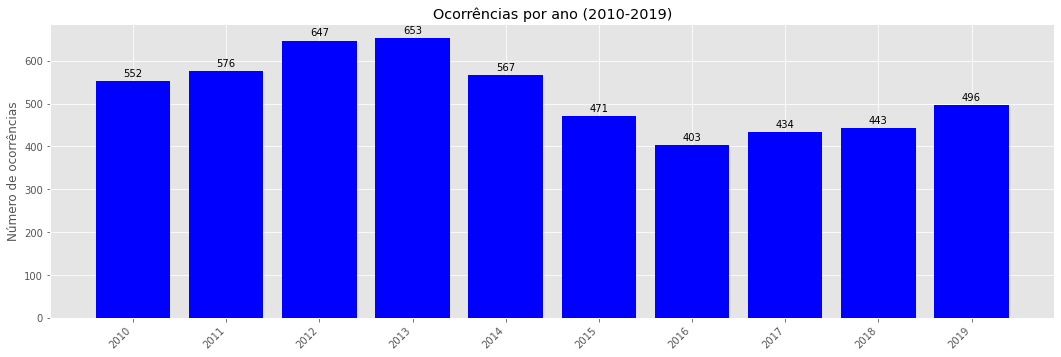

In [ ]:
grafico.style.use("ggplot")
fig,ax = grafico.subplots(figsize=(18, 6))

x=fase_aeronave_ano[:10]
y=contador_aeronave_ano[:10]

rects1=ax.bar(x, y,color='Blue')

ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
grafico.ylabel("Número de ocorrências")
grafico.title('Ocorrências por ano (2010-2019)')

numero_em_cima(rects1, ax)

grafico.show()

Analisando o gráfico podemos verificar que entre 2010 a 2019 o ano que teve **mais acidentes** foi **2013** com 653.

O ano com **menos acidentes** foi 2016 com 403 acidentes.

### Análisa o tipo de aeronave envolvida em acidentes

In [ ]:
coluna_tipo = colunasSelecionadas['aeronave_tipo']
coluna_tipo.value_counts().sort_index()

ANFÍBIO            12
AVIÃO            4213
BALÃO               1
DIRIGÍVEL           1
HELICÓPTERO       600
HIDROAVIÃO          1
INDETERMINADO      86
PLANADOR           15
TRIKE               5
ULTRALEVE         308
Name: aeronave_tipo, dtype: int64

In [ ]:
coluna_tipo = Counter(dados['aeronave_tipo'])
fase_aeronave_tipo = sorted(coluna_tipo, key = coluna_tipo.get, reverse = True)
contador_aeronave_tipo = sorted(list(coluna_tipo.values()), reverse = True)

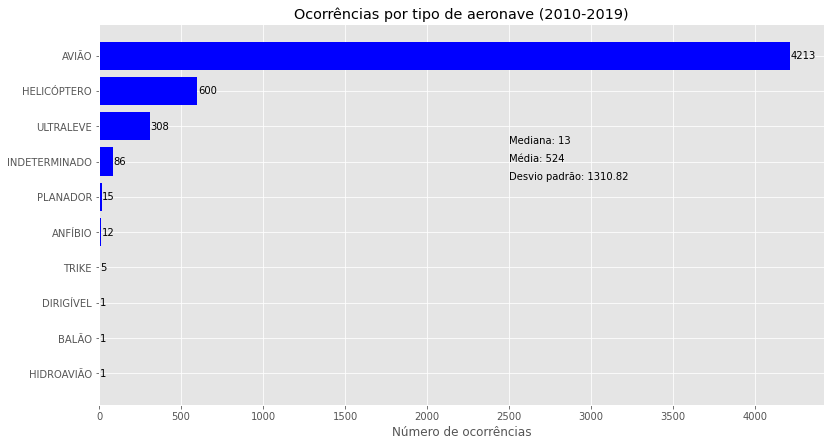

In [ ]:
grafico.style.use("ggplot")
fig,ax = grafico.subplots(figsize=(13, 7))

x=fase_aeronave_tipo[:10]
y=contador_aeronave_tipo[:10]

ax.barh(x, y, color='b')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
grafico.xlabel('Número de ocorrências')
grafico.title('Ocorrências por tipo de aeronave (2010-2019)')

grafico.text(2500, 2.5, 'Mediana: %d'%(np.median(np.array(contador_aeronave_tipo))))
grafico.text(2500, 3.0, 'Média: %d'%(np.mean(np.array(contador_aeronave_tipo))))
grafico.text(2500, 3.5, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_tipo)))

grafico.show()


Após a análise gráfica podemos concluir que o tipo de aeronave com **maior índice** de ocorrencias é o **avião** com 4213 casos.

Já o tipo de aeronave com **menor índice** de casos estão entre três tipos: **Balão**, **Dirigível** e **Hidroavião**.

Algo a se levar em conta são os casos de **aeronaves não determinadas** com um valor alto de **86 casos**

### Análisa o status das ocorrências de acidentes

In [ ]:
coluna_status = colunasSelecionadas['status_investigacao']
coluna_status.value_counts().sort_index()

ATIVA             816
FINALIZADA       4066
INDETERMINADA     360
Name: status_investigacao, dtype: int64

In [ ]:
ocorrencia_status = Counter(dados['status_investigacao'])
fase_status = sorted(ocorrencia_status, key = ocorrencia_status.get, reverse = True)
contador_status = sorted(list(ocorrencia_status.values()), reverse = True)

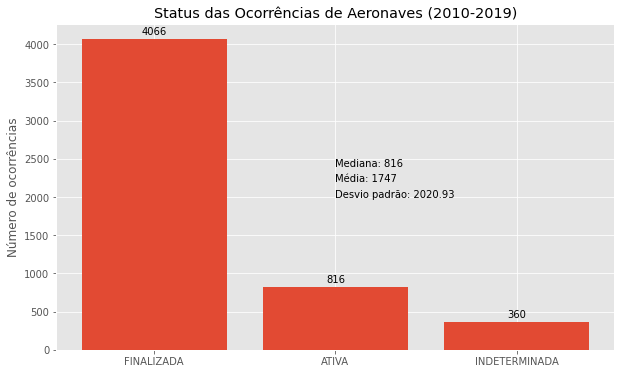

In [ ]:
grafico.style.use("ggplot")
fig,ax = grafico.subplots(figsize=(10, 6))

x=fase_status
y=contador_status

rects1=ax.bar(x, y)

grafico.xlabel('')
ax.set_xticks(x)
grafico.ylabel("Número de ocorrências")
grafico.title('Status das Ocorrências de Aeronaves (2010-2019)')

grafico.text(1, 2400.2, 'Mediana: %d'%(np.median(np.array(contador_status))))
grafico.text(1, 2200.4, 'Média: %d'%(np.mean(np.array(contador_status))))
grafico.text(1, 2000.5, 'Desvio padrão: %.2f'%(static.stdev(contador_status)))

numero_em_cima(rects1, ax)

grafico.show()


No período proprosto grande parte das ocorrências foram finalizadas com uma quantidade de 4066 casos sendo mais ou menos 77% de todas desse período.

### Regressão Linear - Número de assentos

In [ ]:
df = colunasSelecionadas.drop(colunasSelecionadas.loc[colunasSelecionadas['aeronave_ano_fabricacao']==0].index, inplace=True)
df = colunasSelecionadas.drop(colunasSelecionadas.loc[colunasSelecionadas['aeronave_ano_fabricacao']==9999].index, inplace=True)

pair_col1 = ['aeronave_assentos', 'aeronave_ano_fabricacao']

sns.set_theme(style="ticks") 

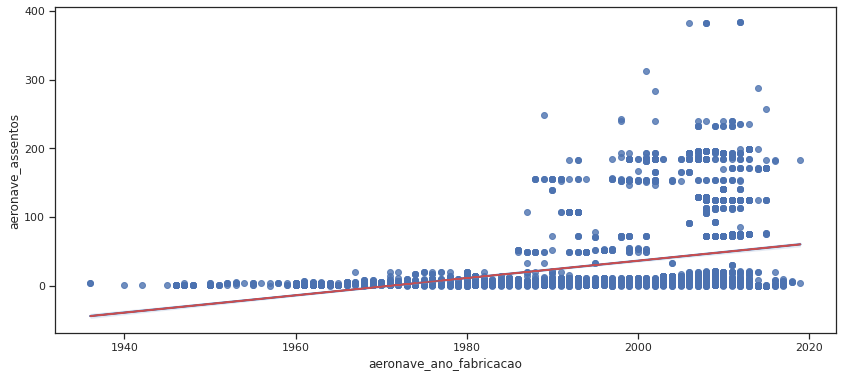

In [ ]:
df = pd.DataFrame()
df['x'] = colunasSelecionadas['aeronave_ano_fabricacao']
df['y'] = colunasSelecionadas['aeronave_assentos']
x_values = df[['x']]
y_values = df[['y']]

grafico.figure(figsize=(14,6))

sns.regplot(x='aeronave_ano_fabricacao', y='aeronave_assentos', data=colunasSelecionadas)

fit = np.polyfit(df['x'].values, df['y'].values, 1)
reta = np.poly1d(fit)

grafico.plot(df['x'].values, reta(df['x'].values), 'r')
grafico.show()

O gráfico representa o eixo x com o ano de fabricação das aeronaves e o eixo y representa o valor dos assentos, que ao passar dos anos aumentou bruscamente.

A linha vermelha representa a tendência de assentos com o passar dos anos em que ocorreram os acidentes.

Nota-se que aviões de pequeno porte abaixo de 100 assentos tem grandes indíces de ocorrências, mas que aviões com grande porte teve uma elevação grande após 1980.

Entre esse período um dos tipos de aeronave que teve destaque nos acidentes foi Boeing com os seus variantes 707, 767, 737 e etc..(ANAC).

# Relatório Final

O presente trabalho buscou apresentar informações a respeito de acidentes envolvendo aeronaves brasileiras no período entre 2010 a 2019. Toda a análise está totalmente ligada aos dados disponíveis e produzidos pelo CENIPA.

Tendo como objetivos princípais analisar e mostrar informações sobre número de acidentes por ano; tipo de aeronave envolvidas nos acidentes; os status das ocorrências e outros...

Observa-se que o estado com maior caso de ocorrências é São Paulo, onde grande parte dos casos foram por avioẽs e helicóptero com grande parte dos casos já finalizados.

Estados com menor demanda de voos tem menor ocorrência de acidentes sendo alguns deles: Amapá; Rio Grande do Norte; Sergipe e Paraíba.

Levando em conta a análise o meio de transporte aéreo é o mais seguro mesmo com tantos casos relatados, acima do ônibus, trem, barco, carro e moto pelo ranking 
disponivel BrigTek.


# Referências Bibliográficas
CENIPA, FCA 58-1 Ocorrências Aeronáuticas: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações e Prevenção de Acidentes Aeronáuticos. 2016.

CAMARA, Gilberto; ASSIS, Luiz F.; QUEIROZ, Gilberto R.;FERREIRA, Karine R.; LLAPA, Eduardo; VINHAS, Lubia. Big earth observation data analytics: matching requirements to system architectures. Proceedings of the 5th ACM SIGSPATIAL International Workshop on Analytics for Big Geospatial Data. 2016.

CHOUDHARY, Jayvant; OHRI, Anurag; KUMAR, Brind. Identification of Road Accidents Hot Spots in Varanasi using QGIS. Proceedings of National Conference on Open Source GIS: Opportunities and Challenges Department of Civil Engineering, IIT(BHU), 2015.

EMC. Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data. Wiley, EMC Education Services, 1st Edition, 2015, 399 p.

GRUS, Joel. Data Science from Scratch: First Principles with Python. O'Reilly Media, Inc., 1st ed., 2015, 330 p.

WAGNER, Michael; LLORT, Gérman; MERCADAL, Estanislao;GIMÉNEZ, Judit; LABARTA, Jesús. Performance Analysis of Parallel Python Applications. Proceeding of International Conference on Computational Science, ICCS. 2017.

COUTINHO, Thiago. O que é a biblioteca Pandas?. Voitto,[S.I.], 2021.Disponível em:https://www.voitto.com.br/blog/artigo/biblioteca-pandas. Acesso em: 7 de nov. 2021

JUNIOR, Luiz S.. Entendendo a biblioteca NumPy. Medium, [S.I.], 2018.Disponível em:https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355. Acesso em: 7 de nov. 2021

UFPR. 4. SciPy. [S.I.]. [?]. Disponível em:http://www.estruturas.ufpr.br/disciplinas/pos-graduacao/introducao-a-computacao-cientifica-com-python/introducao-python/capitulo-4-scipy. Acesso em: 7 de nov. 2021

MACHADO, Alysson. Biblioteca Matplotlib do Python. Medium, [S.I.], 2020.Disponível em:https://medium.com/@alyssonmachado388/biblioteca-matplotlib-do-python-5e32104439d0. Acesso em: 7 de nov. 2021

SCHÖNHOFEN, Ricardo D.. Biblioteca Seaborn com o matplotlib. Vooo, [S.I.],2017.Disponível em:https://www.vooo.pro/insights/biblioteca-seaborn-com-o-matplotlib/. Acesso em: 7 de nov. 2021

PYTHON. Collections — Tipos de dados do contêiner. [S.I.], [?] ,Disponível em: https://docs.python.org/3/library/collections.html. Acesso em: 7 de nov. 2021


BringTek: https://bringtekcuriosity.com/2020/11/09/quais-sao-os-meios-de-transporte-mais-seguros-do-mundo/